Task 1: Exploratory Data Analysis 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline


In [6]:
# laoding the raw accerlerometer data
data= pd.read_csv('data.csv')

#loading the full data containing all the features(acc,gyro,mag)
full_data= pd.read_csv("full_data.csv")

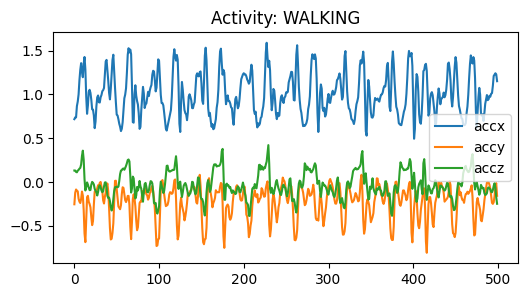

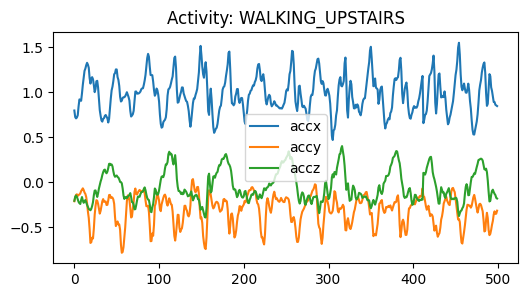

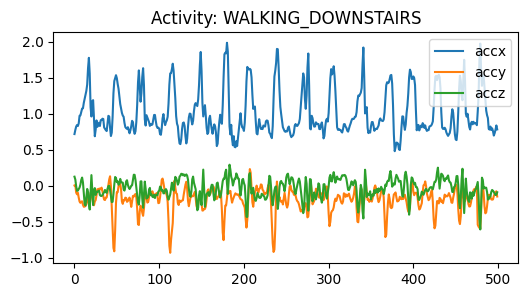

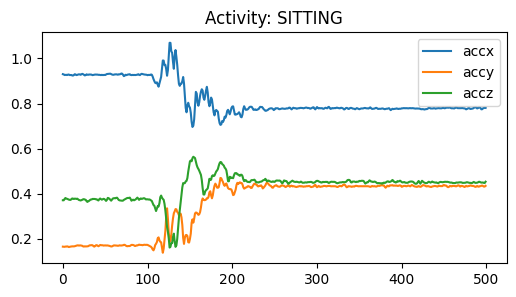

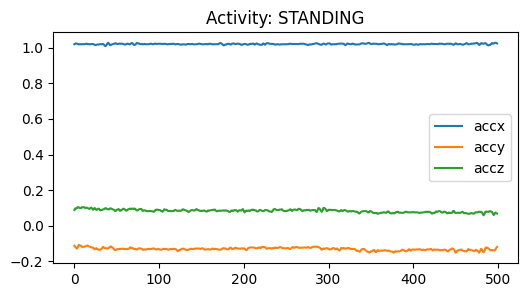

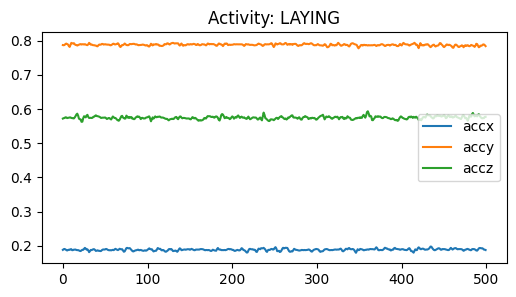

In [7]:
# plot activity-wise raw accelerometer data for a single subject 

subject_chosen= 1        # Person 1 is chosen

activities= np.arange(1,7)

data_for_person1= data[data['subject']== subject_chosen]
data_for_person1.reset_index(drop=True, inplace= True)

activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

for activity,code in activity_code.items():
    activity_chosen= code

    df= data_for_person1[data_for_person1['activity']== activity_chosen].iloc[:500,:]
    df.reset_index(drop=True, inplace= True)

    plt.figure(figsize= (6,3))
    plt.title(f'Activity: {activity}')
    plt.plot(df['accx'], label= 'accx')
    plt.plot(df['accy'], label= 'accy')
    plt.plot(df['accz'], label= 'accz')
    plt.legend()
    plt.show()

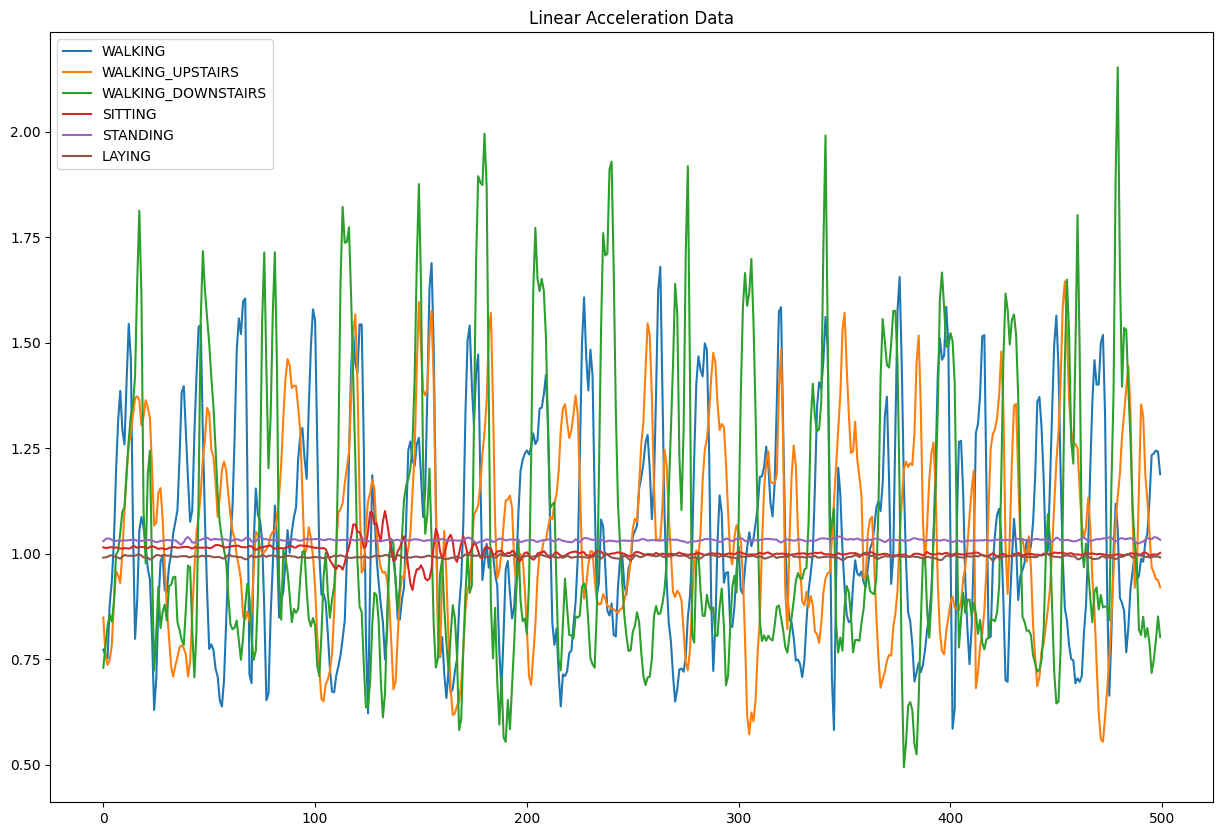

In [8]:
# plot of activity-wise linear acceleration data for person 1

activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

plt.figure(figsize= (15,10))
plt.title('Linear Acceleration Data')

for activity,code in activity_code.items():
    activity_chosen= code

    df= data_for_person1[data_for_person1['activity']== activity_chosen].iloc[:500,:]
    df.reset_index(drop=True, inplace= True)
    df["linear_acc"]= np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)

    plt.plot(df['linear_acc'], label= f'{activity}')

plt.legend()
plt.show()

C:\Users\ADITI\AppData\Local\Temp\ipykernel_10836\1960235348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_person1["linear_acc"]= np.sqrt(data_for_person1['accx']**2 + data_for_person1['accy']**2 + data_for_person1['accz']**2)
C:\Users\ADITI\AppData\Local\Temp\ipykernel_10836\1960235348.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear_acc["linear_acc"]= scaler.transform(df_linear_acc[["linear_acc"]])
C:\Users\ADITI\AppData\Local\Temp\ipykernel_10836\1960235348.py:25: SettingWith

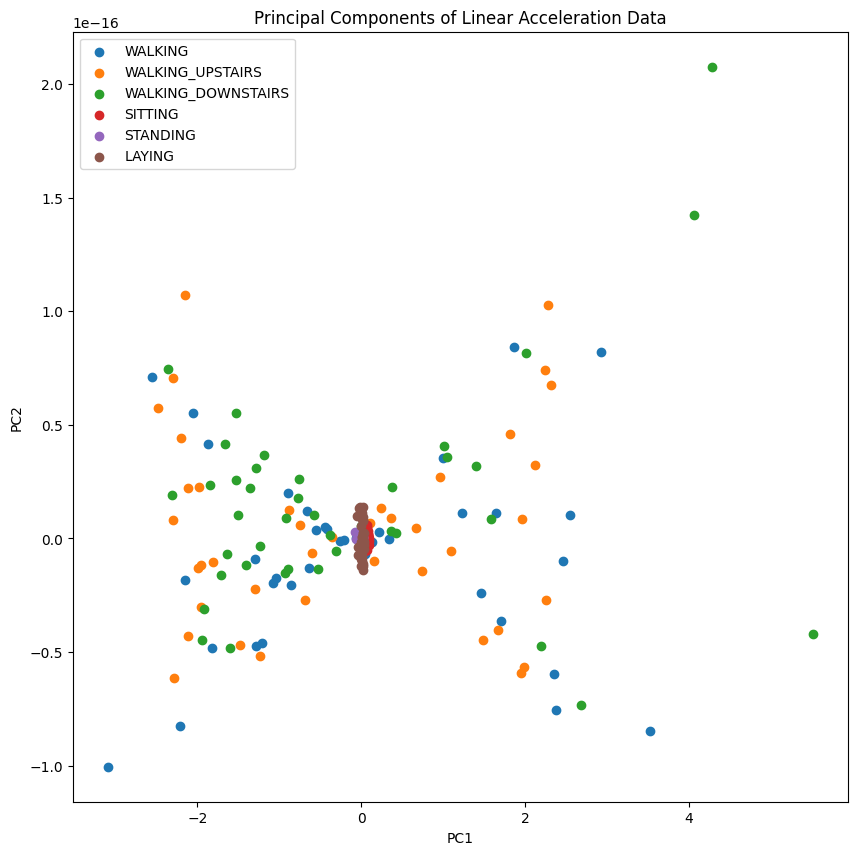

In [9]:
# Extract two principal components out of activity-wise linear_acc column vector and plot them
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


"""adding linear_acc column""" 
data_for_person1["linear_acc"]= np.sqrt(data_for_person1['accx']**2 + data_for_person1['accy']**2 + data_for_person1['accz']**2)

df_linear_acc= data_for_person1[["linear_acc", "activity"]]

"""Normalize the linear_acc column"""
scaler= StandardScaler()
scaler.fit(df_linear_acc[["linear_acc"]])
df_linear_acc["linear_acc"]= scaler.transform(df_linear_acc[["linear_acc"]])

activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

plt.figure(figsize= (10,10))
plt.title('Principal Components of Linear Acceleration Data')

for activity,code in activity_code.items():
    activity_chosen= code

    temp_df= df_linear_acc[df_linear_acc['activity']== code]
    temp_df["linear_acc2"]= temp_df["linear_acc"]
    
    # PCA implementation on linear_acc and linear_acc2 columns
    pca= PCA(n_components=2)
    pca.fit(temp_df[["linear_acc","linear_acc2"]])
    x_pca= pca.transform(temp_df[["linear_acc","linear_acc2"]])

    plt.scatter(x_pca[:40,0], x_pca[:40,1], label= f'{activity}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


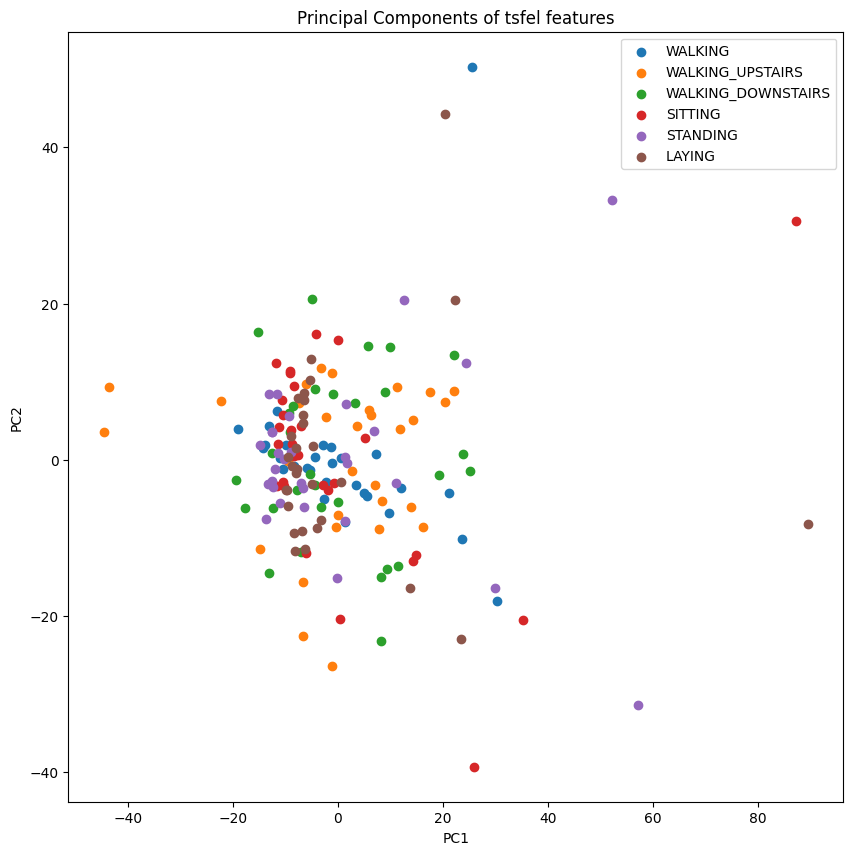

In [10]:
"""
Use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) 
and then perform PCA to obtain two features.
Plot a scatter plot to visualize different class of activities
"""

"""
Time Series Feature Extraction Library (TSFEL for short) is a Python package for feature
extraction on time series data. It provides exploratory feature extraction tasks on time series 
without requiring significant programming effort. 
TSFEL automatically extracts over 60 different features on the statistical, temporal and spectral domains.
"""

import tsfel

activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

plt.figure(figsize= (10,10))
plt.title('Principal Components of tsfel features')

for activity,code in activity_code.items():
    activity_chosen= code

    temp_df= data[data['activity']== code]

    """Extracting features using tsfel"""
    df = temp_df[["accx", "accy", "accz"]]
    # Retrieves a pre-defined feature configuration file to extract all available features
    cfg = tsfel.get_features_by_domain()           # If no argument is passed retrieves all available features
    # Extract features
    tsfel_df = tsfel.time_series_features_extractor(cfg, df, fs=50, window_size=500)    
    # Above function receives a time series sampled at 50 Hz, divides into windows of size 500 (i.e. 10 seconds)

    """Normalize the tsfel data"""
    scaler= StandardScaler()
    scaler.fit(tsfel_df)
    tsfel_df= pd.DataFrame(scaler.transform(tsfel_df))


    """Performing PCA on extracted_features"""
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(tsfel_df)

    plt.scatter(pca_features[:,0], pca_features[:,1], label= f'{activity}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

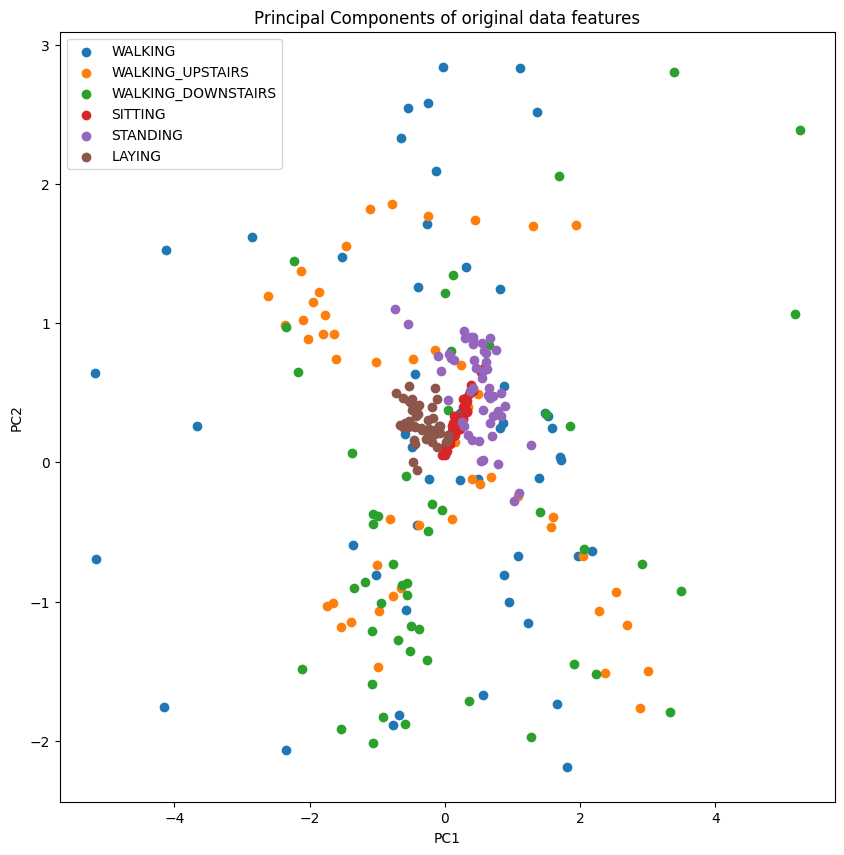

In [11]:
"""Performing PCA on original data features(accx,accy,accz, body_accx, body_accy, body_accz, body_gyro_x, body_gyro_y, body_gyro_z)"""

activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

plt.figure(figsize= (10,10))
plt.title('Principal Components of original data features')

for activity,code in activity_code.items():
    activity_chosen= code

    temp_df= full_data[full_data['activity']== code]

    df = temp_df[["accx", "accy", "accz", "body_accx", "body_accy", "body_accz", "body_gyrox", "body_gyroy", "body_gyroz"]]

    """Normalize the data"""
    scaler= StandardScaler()
    scaler.fit(df)
    df= pd.DataFrame(scaler.transform(df))

    """Performing PCA on original data features"""
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(df)

    plt.scatter(pca_features[:50,0], pca_features[:50,1], label= f'{activity}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [15]:
"""Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset"""

"""Extracting features using tsfel"""

df= full_data[["accx", "accy", "accz", "body_accx", "body_accy", "body_accz", "body_gyrox", "body_gyroy", "body_gyroz"]]

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()           # If no argument is passed retrieves all available features

# Extract features
tsfel_df = tsfel.time_series_features_extractor(cfg, df , fs=50, window_size=500)   

"""Correlation matrics """

print("Correlation matrix of original data features")
df= full_data.drop(['subject','activity'],axis= 1, inplace=False)
print(pd.DataFrame(df.corr()))

print("\n\nCorrelation matrix of tsfel features")
tsfel_df.iloc[:,:5].corr()

*** Feature extraction started ***



*** Feature extraction finished ***
Correlation matrix of original data features
                accx      accy      accz  body_accx  body_accy  body_accz   
accx        1.000000 -0.697496 -0.575771   0.482070  -0.161669  -0.074966  \
accy       -0.697496  1.000000  0.678967  -0.098350   0.317717   0.056912   
accz       -0.575771  0.678967  1.000000  -0.055825   0.074565   0.301215   
body_accx   0.482070 -0.098350 -0.055825   1.000000  -0.303198  -0.181135   
body_accy  -0.161669  0.317717  0.074565  -0.303198   1.000000   0.191458   
body_accz  -0.074966  0.056912  0.301215  -0.181135   0.191458   1.000000   
body_gyrox  0.009976 -0.023160 -0.006016   0.045089  -0.044865  -0.016754   
body_gyroy  0.041047 -0.023164 -0.030892   0.083726  -0.070071  -0.100734   
body_gyroz -0.029590  0.046436  0.011666  -0.049936   0.143565   0.006443   

            body_gyrox  body_gyroy  body_gyroz  
accx          0.009976    0.041047   -0.029590  
accy         -0.023160   -0.023164    0.046436  


,accx_Absolute energy,accx_Area under the curve,accx_Autocorrelation,accx_Average power,accx_Centroid
accx_Absolute energy,1.000000,0.982324,-0.298890,1.000000,0.194906
accx_Area under the curve,0.982324,1.000000,-0.257843,0.982324,0.208028
accx_Autocorrelation,-0.298890,-0.257843,1.000000,-0.298890,-0.379226
accx_Average power,1.000000,0.982324,-0.298890,1.000000,0.194906
accx_Centroid,0.194906,0.208028,-0.379226,0.194906,1.000000
